### Clustering

In [68]:
import numpy as np
import pandas as pd

from FinancialMachineLearning.portfolio_optimization.clustering import clusterKMeansBase, clusterKMeansTop
from FinancialMachineLearning.generator.pca_blocks import *

In [69]:
randomBlockCorr = get_random_block_correlation(
    nCols = 50, nBlocks = 10, random_state = 42, minBlockSize = 1
)

<Axes: >

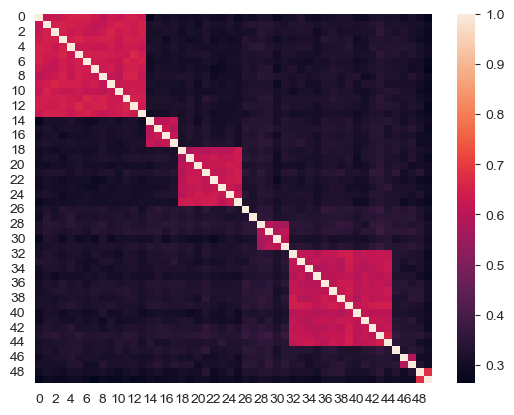

In [70]:
import seaborn as sns

sns.heatmap(
    randomBlockCorr
)

In [15]:
corr1, clusters, silh_coef = clusterKMeansBase(
    randomBlockCorr, maxNumClusters = 10, n_init = 1
)

<Axes: >

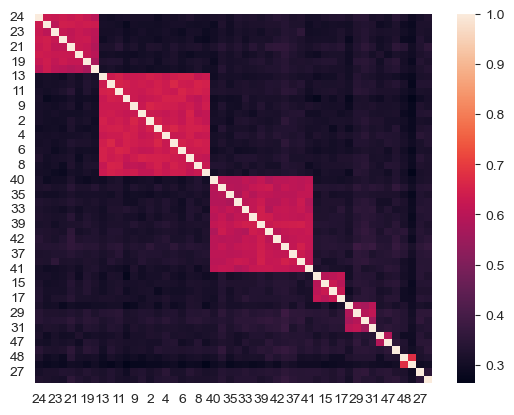

In [16]:
sns.heatmap(
    corr1
)

In [18]:
corr2, clusters2, silh_coef2 = clusterKMeansTop(
    randomBlockCorr, maxNumClusters = 10, n_init = 1
)

clstrs length:8
best clustr:8
clstrs length:3
best clustr:3
If 2 or less clusters have a quality rating less than the average then stop.
redoCluster <=1:[0] clstrs len:3
clstrs2.len, stat:3
newTstatMean > tStatMean41.73160569847134 (len:newClst)7 > 33.45036759878001 (len:Clst)8


<Axes: >

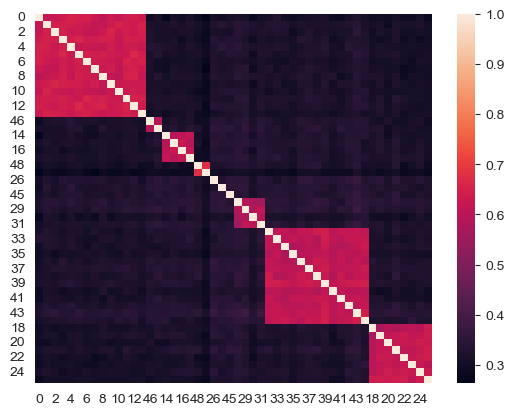

In [20]:
sns.heatmap(
    corr2
)

In [21]:
clusters2

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 1: [46, 47],
 2: [14, 15, 16, 17],
 3: [48, 49],
 4: [26, 27, 45, 28, 29, 30, 31],
 5: [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
 6: [18, 19, 20, 21, 22, 23, 24, 25]}

In [22]:
silh_coef2

0     0.401304
1     0.399673
2     0.400885
3     0.413151
4     0.392005
5     0.409022
6     0.404685
7     0.395422
8     0.389888
9     0.401677
10    0.387454
11    0.408337
12    0.408037
13    0.405292
14    0.274405
15    0.269899
16    0.288989
17    0.277038
18    0.301853
19    0.322637
20    0.338984
21    0.320653
22    0.340242
23    0.327142
24    0.335116
25    0.346422
26   -0.013732
27   -0.014700
28    0.125298
29    0.126245
30    0.124889
31    0.124038
32    0.352160
33    0.346220
34    0.332866
35    0.336846
36    0.338018
37    0.348532
38    0.345375
39    0.374744
40    0.334374
41    0.347073
42    0.340613
43    0.344021
44    0.356279
45   -0.008523
46    0.237647
47    0.232445
48    0.332550
49    0.346123
dtype: float64

### Empirical Data

In [24]:
import warnings 
warnings.filterwarnings('ignore')

stock_list = pd.read_csv('stock_list.csv', index_col = 0)

In [59]:
code = stock_list['Code'][stock_list['Code'].str[-1] == '0'][:500]

In [60]:
import pandas_datareader as pdr
import datetime

data = pd.DataFrame()

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 3, 7)

for i in code :
    data = pd.concat(
        [data, 
        pdr.DataReader(i, "naver", start_date, end_date)['Close']], 
        axis = 1
    )
data.columns = code

In [61]:
data.dropna(axis = 1, inplace = True)

In [62]:
kospi_corr = data.corr()

<Axes: xlabel='Code', ylabel='Code'>

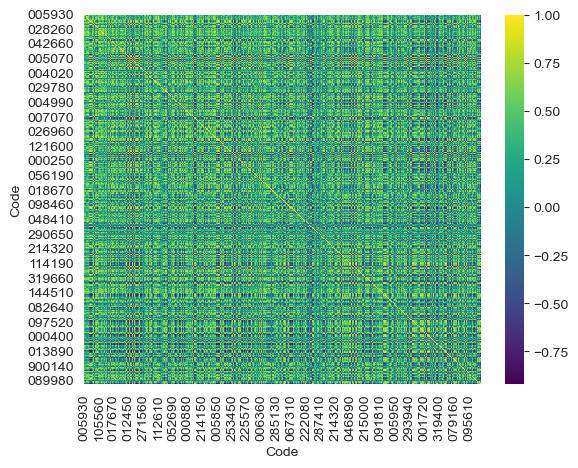

In [63]:
sns.heatmap(
    kospi_corr,
    cmap = 'viridis'
)

In [64]:
corr1, clusters, silh_coef = clusterKMeansBase(
    kospi_corr, maxNumClusters = 10, n_init = 1
)

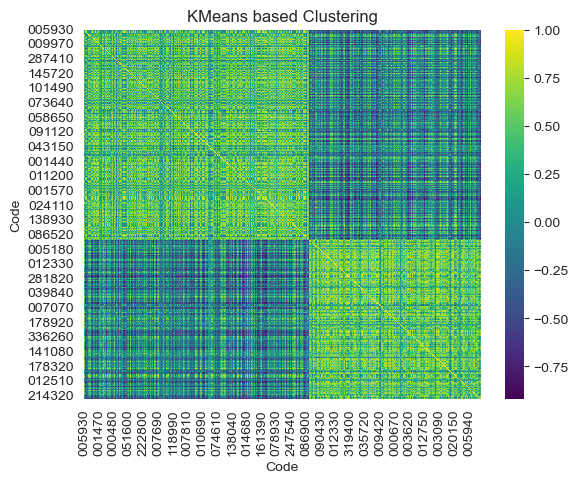

In [65]:
import matplotlib.pyplot as plt
sns.heatmap(
    corr1,
    cmap = 'viridis'
)
plt.title('KMeans based Clustering')
plt.show()

In [66]:
corr2, clusters2, silh_coef2 = clusterKMeansTop(
    kospi_corr, maxNumClusters = 10, n_init = 1
)

clstrs length:2
best clustr:2
If 2 or less clusters have a quality rating less than the average then stop.
redoCluster <=1:[0] clstrs len:2


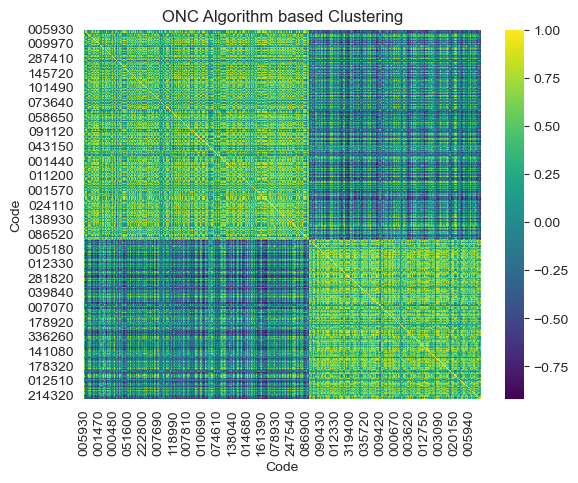

In [67]:
sns.heatmap(
    corr2,
    cmap = 'viridis'
)
plt.title('ONC Algorithm based Clustering')
plt.show()